In [1]:
!poetry add pyarrow
!poetry add seaborn

The following packages are already present in the pyproject.toml and will be skipped:

  • pyarrow

If you want to update it to the latest compatible version, you can use `poetry update package`.
If you prefer to upgrade it to the latest available version, you can use `poetry add package@latest`.

Nothing to add.
The following packages are already present in the pyproject.toml and will be skipped:

  • seaborn

If you want to update it to the latest compatible version, you can use `poetry update package`.
If you prefer to upgrade it to the latest available version, you can use `poetry add package@latest`.

Nothing to add.


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [108]:
users = pd.read_parquet("/home/pamalo/zrive-ds/data/module_2/users.parquet")
print(users.info())



<class 'pandas.core.frame.DataFrame'>
Index: 4983 entries, 2160 to 3360
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                4983 non-null   object 
 1   user_segment           4983 non-null   object 
 2   user_nuts1             4932 non-null   object 
 3   first_ordered_at       4983 non-null   object 
 4   customer_cohort_month  4983 non-null   object 
 5   count_people           325 non-null    float64
 6   count_adults           325 non-null    float64
 7   count_children         325 non-null    float64
 8   count_babies           325 non-null    float64
 9   count_pets             325 non-null    float64
dtypes: float64(5), object(5)
memory usage: 428.2+ KB
None


In [6]:
orders = pd.read_parquet("/home/pamalo/zrive-ds/data/module_2/orders.parquet")
print(orders.info())

<class 'pandas.core.frame.DataFrame'>
Index: 8773 entries, 10 to 64538
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              8773 non-null   int64         
 1   user_id         8773 non-null   object        
 2   created_at      8773 non-null   datetime64[us]
 3   order_date      8773 non-null   datetime64[us]
 4   user_order_seq  8773 non-null   int64         
 5   ordered_items   8773 non-null   object        
dtypes: datetime64[us](2), int64(2), object(2)
memory usage: 479.8+ KB
None


In [7]:
regulars = pd.read_parquet("/home/pamalo/zrive-ds/data/module_2/regulars.parquet")
print(regulars.info())

<class 'pandas.core.frame.DataFrame'>
Index: 18105 entries, 3 to 37720
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     18105 non-null  object        
 1   variant_id  18105 non-null  int64         
 2   created_at  18105 non-null  datetime64[us]
dtypes: datetime64[us](1), int64(1), object(1)
memory usage: 565.8+ KB
None


In [8]:
inventory = pd.read_parquet("/home/pamalo/zrive-ds/data/module_2/inventory.parquet")
print(inventory.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1733 entries, 0 to 1732
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   variant_id        1733 non-null   int64  
 1   price             1733 non-null   float64
 2   compare_at_price  1733 non-null   float64
 3   vendor            1733 non-null   object 
 4   product_type      1733 non-null   object 
 5   tags              1733 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 81.4+ KB
None


In [11]:
abandcarts = pd.read_parquet("/home/pamalo/zrive-ds/data/module_2/abandoned_carts.parquet")
print(abandcarts.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5457 entries, 0 to 70050
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          5457 non-null   int64         
 1   user_id     5457 non-null   object        
 2   created_at  5457 non-null   datetime64[us]
 3   variant_id  5457 non-null   object        
dtypes: datetime64[us](1), int64(1), object(2)
memory usage: 213.2+ KB
None


## Primeras impresiones
- Dentro de usuarios tenemos variables con missing values(count_people, count_adults, count_children, count_babies, count_pets). Podrían ser valores opcionales a rellanar que el usuario omite completar.
- ¿Que tipo de usuarios tenemos?


In [65]:
users.head()

,user_id,user_segment,user_nuts1,first_ordered_at,customer_cohort_month,count_people,count_adults,count_children,count_babies,count_pets
2160,0e823a42e107461379e5b5613b7aa00537a72e1b0eaa7a...,Top Up,UKH,2021-05-08 13:33:49,2021-05-01 00:00:00,NaN,NaN,NaN,NaN,NaN
1123,15768ced9bed648f745a7aa566a8895f7a73b9a47c1d4f...,Top Up,UKJ,2021-11-17 16:30:20,2021-11-01 00:00:00,NaN,NaN,NaN,NaN,NaN
1958,33e0cb6eacea0775e34adbaa2c1dec16b9d6484e6b9324...,Top Up,UKD,2022-03-09 23:12:25,2022-03-01 00:00:00,NaN,NaN,NaN,NaN,NaN
675,57ca7591dc79825df0cecc4836a58e6062454555c86c35...,Top Up,UKI,2021-04-23 16:29:02,2021-04-01 00:00:00,NaN,NaN,NaN,NaN,NaN
4694,085d8e598139ce6fc9f75d9de97960fa9e1457b409ec00...,Top Up,UKJ,2021-11-02 13:50:06,2021-11-01 00:00:00,NaN,NaN,NaN,NaN,NaN


In [14]:
users.describe()

,count_people,count_adults,count_children,count_babies,count_pets
count,325.000000,325.000000,325.000000,325.000000,325.000000
mean,2.787692,2.003077,0.707692,0.076923,0.636923
std,1.365753,0.869577,1.026246,0.289086,0.995603
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,0.000000,0.000000,0.000000
50%,3.000000,2.000000,0.000000,0.000000,0.000000
75%,4.000000,2.000000,1.000000,0.000000,1.000000
max,8.000000,7.000000,6.000000,2.000000,6.000000


- El 75% de los usuarios no tiene bebes y tiene 1 mascota

In [109]:
# Calcular n_orders agrupados por user_id
n_orders_per_user = orders.groupby('user_id')['id'].count().reset_index().rename(columns={'id': 'n_orders'})

# Fusionar los datos
users = users.merge(n_orders_per_user, on='user_id', how='left').fillna({'n_orders': 0})
users.head()

,user_id,user_segment,user_nuts1,first_ordered_at,customer_cohort_month,count_people,count_adults,count_children,count_babies,count_pets,n_orders
0,0e823a42e107461379e5b5613b7aa00537a72e1b0eaa7a...,Top Up,UKH,2021-05-08 13:33:49,2021-05-01 00:00:00,NaN,NaN,NaN,NaN,NaN,1
1,15768ced9bed648f745a7aa566a8895f7a73b9a47c1d4f...,Top Up,UKJ,2021-11-17 16:30:20,2021-11-01 00:00:00,NaN,NaN,NaN,NaN,NaN,1
2,33e0cb6eacea0775e34adbaa2c1dec16b9d6484e6b9324...,Top Up,UKD,2022-03-09 23:12:25,2022-03-01 00:00:00,NaN,NaN,NaN,NaN,NaN,1
3,57ca7591dc79825df0cecc4836a58e6062454555c86c35...,Top Up,UKI,2021-04-23 16:29:02,2021-04-01 00:00:00,NaN,NaN,NaN,NaN,NaN,10
4,085d8e598139ce6fc9f75d9de97960fa9e1457b409ec00...,Top Up,UKJ,2021-11-02 13:50:06,2021-11-01 00:00:00,NaN,NaN,NaN,NaN,NaN,1


In [110]:
users.describe()

,count_people,count_adults,count_children,count_babies,count_pets,n_orders
count,325.000000,325.000000,325.000000,325.000000,325.000000,4983.000000
mean,2.787692,2.003077,0.707692,0.076923,0.636923,1.760586
std,1.365753,0.869577,1.026246,0.289086,0.995603,1.936537
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,3.000000,2.000000,0.000000,0.000000,0.000000,1.000000
75%,4.000000,2.000000,1.000000,0.000000,1.000000,2.000000
max,8.000000,7.000000,6.000000,2.000000,6.000000,25.000000


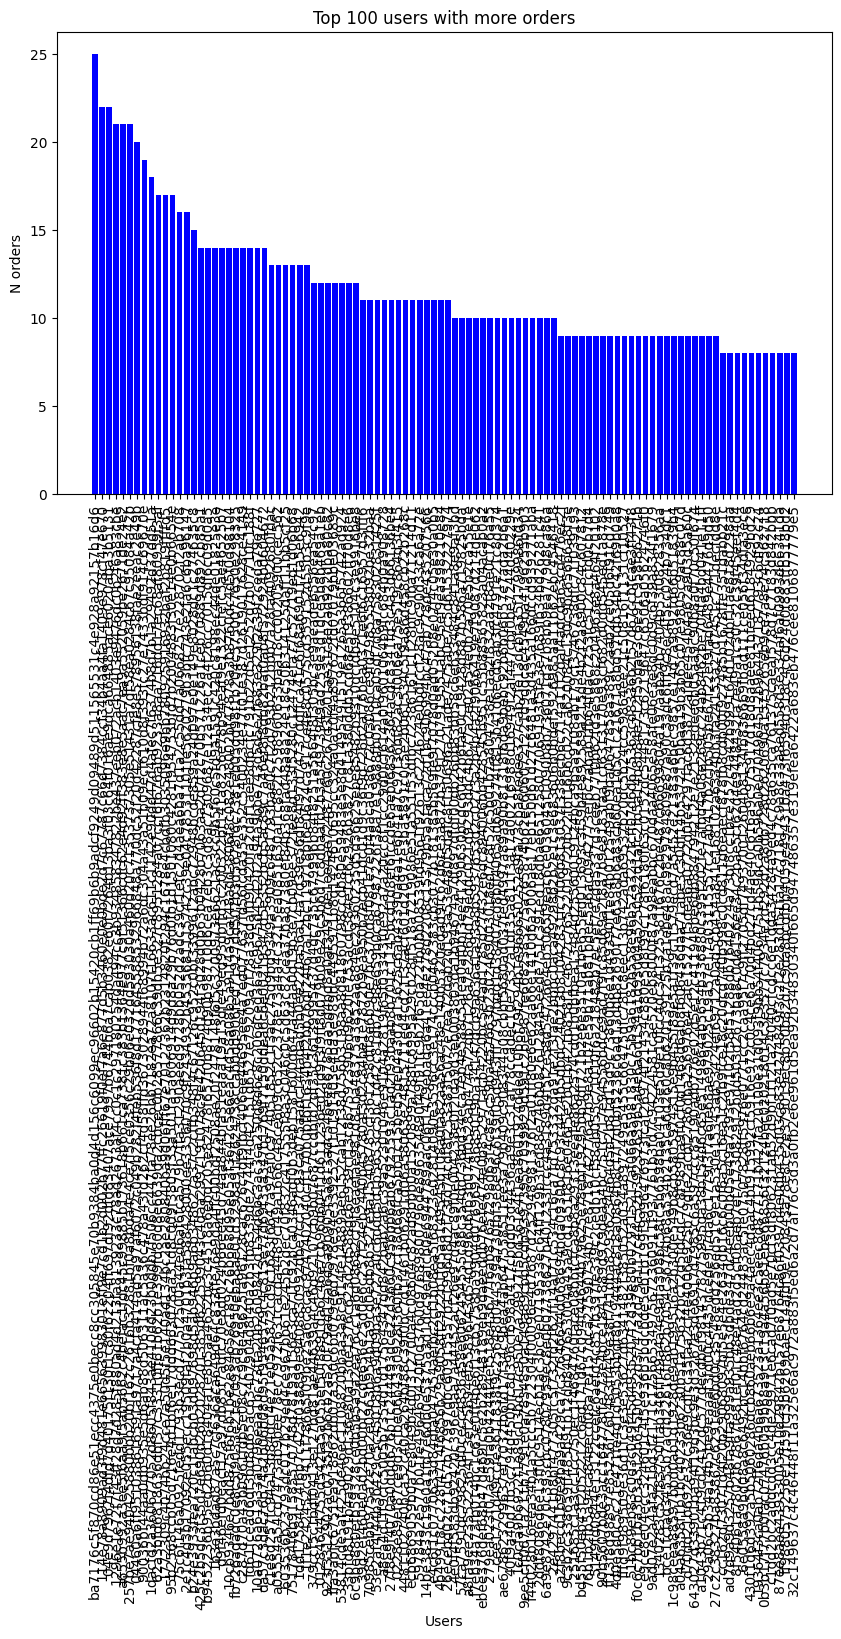

In [116]:
# Count orders by user
orders_by_user = orders['user_id'].value_counts()

#users with more orders
top_10_users = orders_by_user.head(100)

# Crea el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(top_10_users.index, top_10_users.values, color='blue')
plt.xlabel('Users')
plt.ylabel('N orders')
plt.title('Top 100 users with more orders')
plt.xticks(rotation=90)  # Para rotar las etiquetas del eje x
plt.show()

- Máximo número de pedidos por usuario es de 25 y la media de 1,7

In [112]:
# Calcular n_regulars agrupados por user_id
n_regulars = regulars.groupby('user_id')['variant_id'].nunique().reset_index().rename(columns={'variant_id': 'n_regulars'})
# Fusionar los datos
users = users.merge(n_regulars, on='user_id', how='left').fillna({'n_regulars': 0})
users.head()

,user_id,user_segment,user_nuts1,first_ordered_at,customer_cohort_month,count_people,count_adults,count_children,count_babies,count_pets,n_orders,n_regulars
0,0e823a42e107461379e5b5613b7aa00537a72e1b0eaa7a...,Top Up,UKH,2021-05-08 13:33:49,2021-05-01 00:00:00,NaN,NaN,NaN,NaN,NaN,1,0.0
1,15768ced9bed648f745a7aa566a8895f7a73b9a47c1d4f...,Top Up,UKJ,2021-11-17 16:30:20,2021-11-01 00:00:00,NaN,NaN,NaN,NaN,NaN,1,0.0
2,33e0cb6eacea0775e34adbaa2c1dec16b9d6484e6b9324...,Top Up,UKD,2022-03-09 23:12:25,2022-03-01 00:00:00,NaN,NaN,NaN,NaN,NaN,1,0.0
3,57ca7591dc79825df0cecc4836a58e6062454555c86c35...,Top Up,UKI,2021-04-23 16:29:02,2021-04-01 00:00:00,NaN,NaN,NaN,NaN,NaN,10,0.0
4,085d8e598139ce6fc9f75d9de97960fa9e1457b409ec00...,Top Up,UKJ,2021-11-02 13:50:06,2021-11-01 00:00:00,NaN,NaN,NaN,NaN,NaN,1,0.0


In [113]:
users.describe()

,count_people,count_adults,count_children,count_babies,count_pets,n_orders,n_regulars
count,325.000000,325.000000,325.000000,325.000000,325.000000,4983.000000,4983.000000
mean,2.787692,2.003077,0.707692,0.076923,0.636923,1.760586,2.481437
std,1.365753,0.869577,1.026246,0.289086,0.995603,1.936537,8.890588
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,3.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,4.000000,2.000000,1.000000,0.000000,1.000000,2.000000,1.000000
max,8.000000,7.000000,6.000000,2.000000,6.000000,25.000000,320.000000


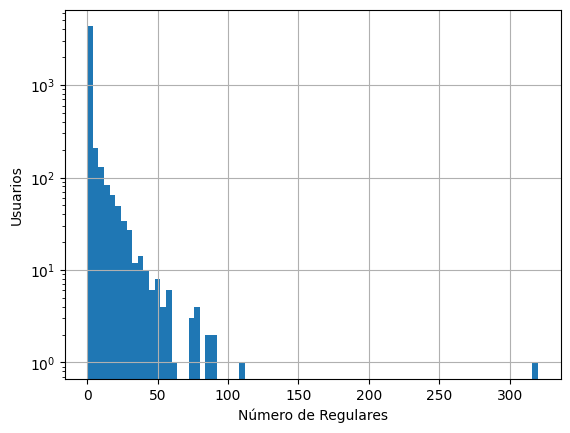

In [114]:
users['n_regulars'].hist(bins=80, log= True)
plt.xlabel('Número de Regulares')
plt.ylabel('Usuarios')
plt.show()

- El 75% tiene 1 regular
- Hay una persona que tiene 300 regulares

Text(0.5, 1.0, 'Average number of regulars per user segment')

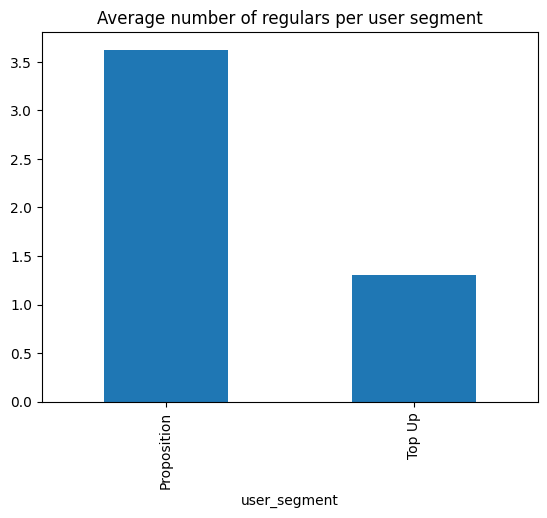

In [118]:
users.loc[lambda x: x.n_regulars< 100].groupby('user_segment')['n_regulars'].mean().plot(kind='bar')
plt.title('Average number of regulars per user segment')

- Proposition tiene mas regulares que Top Up

In [147]:
# Take and count the column count_people without null values
family_inputs = users.count_people.dropna().count()
#Take the three columns of users and sum each value per row. Second sum to count the number of true values(at least one column)
Users_with_pet_children_or_baby = (users[['count_pets', 'count_children', 'count_babies']].sum(axis=1)>0).sum()/family_inputs
print("The percent of users with pets, children or babies is: ", Users_with_pet_children_or_baby*100)

The percent of users with pets, children or babies is:  61.23076923076923


- The percent of users with pets, children or babies is:  61.2%